# Ejercicio 7 Sección 1.1.8
Escriba un programa para graficar lineas equipotenciales u=constante de una función armónica y de su conjugada v en los mismos ejes. Aplique el programa a las siguientes funciones:

Inciso a):

Función ingresada:
u(x,y) = x**2 - y**2
v(x,y) = 2*x*y

Derivadas parciales:
u_x = 2*x
u_y = -2*y
v_x = 2*y
v_y = 2*x

Ecuaciones de Cauchy–Riemann:
u_x - v_y = 0
u_y + v_x = 0
La función es analítica


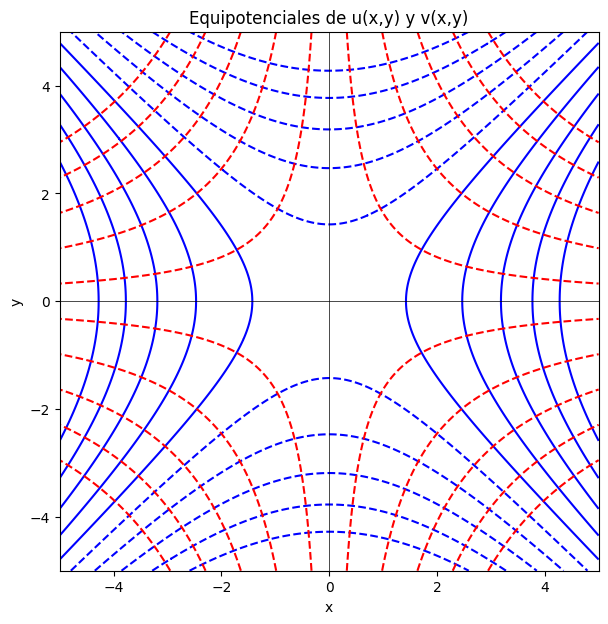

Inciso b):

Función ingresada:
u(x,y) = x**3 - 3*x*y**2
v(x,y) = 3*x**2*y - y**3

Derivadas parciales:
u_x = 3*x**2 - 3*y**2
u_y = -6*x*y
v_x = 6*x*y
v_y = 3*x**2 - 3*y**2

Ecuaciones de Cauchy–Riemann:
u_x - v_y = 0
u_y + v_x = 0
La función es analítica


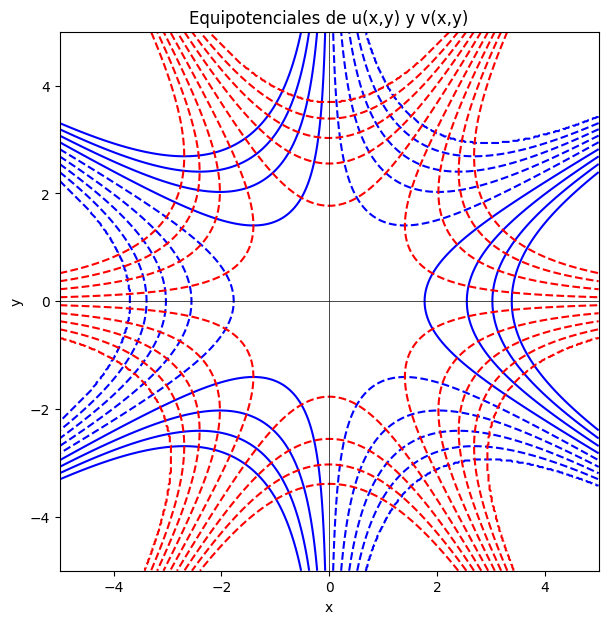

Inciso c):

Función ingresada:
u(x,y) = exp(x)*cos(y)
v(x,y) = exp(x)*sin(y)

Derivadas parciales:
u_x = exp(x)*cos(y)
u_y = -exp(x)*sin(y)
v_x = exp(x)*sin(y)
v_y = exp(x)*cos(y)

Ecuaciones de Cauchy–Riemann:
u_x - v_y = 0
u_y + v_x = 0
La función es analítica


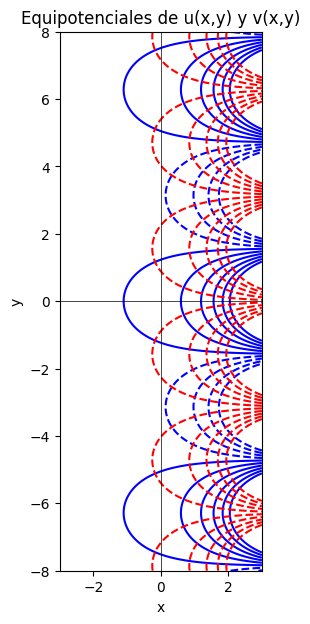

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x, y = sp.symbols('x y', real=True)

# Primero vamos a definir una función general para aplicarlo a cualquier u y v que nos grafique las líneas equipotenciales
def curvas_equi(u, v):

    print("\nFunción ingresada:")
    print("u(x,y) =", u)
    print("v(x,y) =", v)

    # Calculamos las derivadas parciales de u y v y verificamos que se cumplas las ecuaciones de Cauchy-Riemman
    ux = sp.diff(u, x)
    uy = sp.diff(u, y)
    vx = sp.diff(v, x)
    vy = sp.diff(v, y)

    print("\nDerivadas parciales:")
    print("u_x =", ux)
    print("u_y =", uy)
    print("v_x =", vx)
    print("v_y =", vy)

    CR1 = sp.simplify(ux - vy)
    CR2 = sp.simplify(uy + vx)

    print("\nEcuaciones de Cauchy–Riemann:")
    print("u_x - v_y =", CR1)
    print("u_y + v_x =", CR2)

    if CR1 == 0 and CR2 == 0:
        print("La función es analítica")
    else:
        print("La función NO es analítica")

    # Ahora vamos a graficar las líneas equipotenciales
    # Primero creamos la malla numérica teniendo en cuenta que en el inciso c) tenemos un exponencial que requiere un rango pequeño en x
    if u.has(sp.exp(x)) or v.has(sp.exp(x)):
        xmin, xmax = -3, 3
        ymin, ymax = -8, 8
    else:
        xmin, xmax = -5, 5
        ymin, ymax = -5, 5

    N = 500
    X_vals = np.linspace(xmin, xmax, N)
    Y_vals = np.linspace(ymin, ymax, N)
    X, Y = np.meshgrid(X_vals, Y_vals)

    # Convertimos u y v a numéricas
    u_num = sp.lambdify((x, y), u, "numpy")
    v_num = sp.lambdify((x, y), v, "numpy")
    U = u_num(X, Y)
    V = v_num(X, Y)

    # Empleamos np.nan_to_num para evitar NaN, infinito o explosiones numéricas como las del exponencial
    U = np.nan_to_num(U, nan=0.0, posinf=1e3, neginf=-1e3)
    V = np.nan_to_num(V, nan=0.0, posinf=1e3, neginf=-1e3)

    # Limitamos los valores extremos para graficar
    U = np.clip(U, -50, 50)
    V = np.clip(V, -50, 50)

    # Seleccionamos distintos valores de nivel (de C) por percentiles para garantizar curvas bien distribuidas
    u_min, u_max = np.percentile(U, 5), np.percentile(U, 95)
    v_min, v_max = np.percentile(V, 5), np.percentile(V, 95)

    niveles_u = np.linspace(u_min, u_max, 10)
    niveles_v = np.linspace(v_min, v_max, 10)

    # Por último graficamos
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, U, levels=niveles_u, colors='blue')
    plt.contour(X, Y, V, levels=niveles_v, colors='red', linestyles='dashed')
    plt.title("Equipotenciales de u(x,y) y v(x,y)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.gca().set_aspect('equal')
    plt.show()

print("Inciso a):")
curvas_equi(x**2 - y**2, 2*x*y)

print("Inciso b):")
curvas_equi(x**3 - 3*x*y**2, 3*x**2*y - y**3)

print("Inciso c):")
curvas_equi(sp.exp(x)*sp.cos(y), sp.exp(x)*sp.sin(y))
